In [18]:
from hybridpipe import mlpipe, mlht

import pandas as pd

df_read = pd.read_csv('mushrooms.csv')

In [20]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

X = mushroom.data.features 
y = mushroom.data.targets 

df = pd.concat([X, y], axis=1)

In [22]:
pipe = mlpipe(df=df_read,target_column='class',test_size=0.2,random_state=1,display_analytics=True)

Dropped features with >=25% missing values: []
8124 number of instances remaining.
Training Logistic Regression...
Training SVM...
Training KNN...
Training Decision Tree...
Training Random Forest...
Training Extra Trees...
Training Gradient Boosting...
Training AdaBoost...


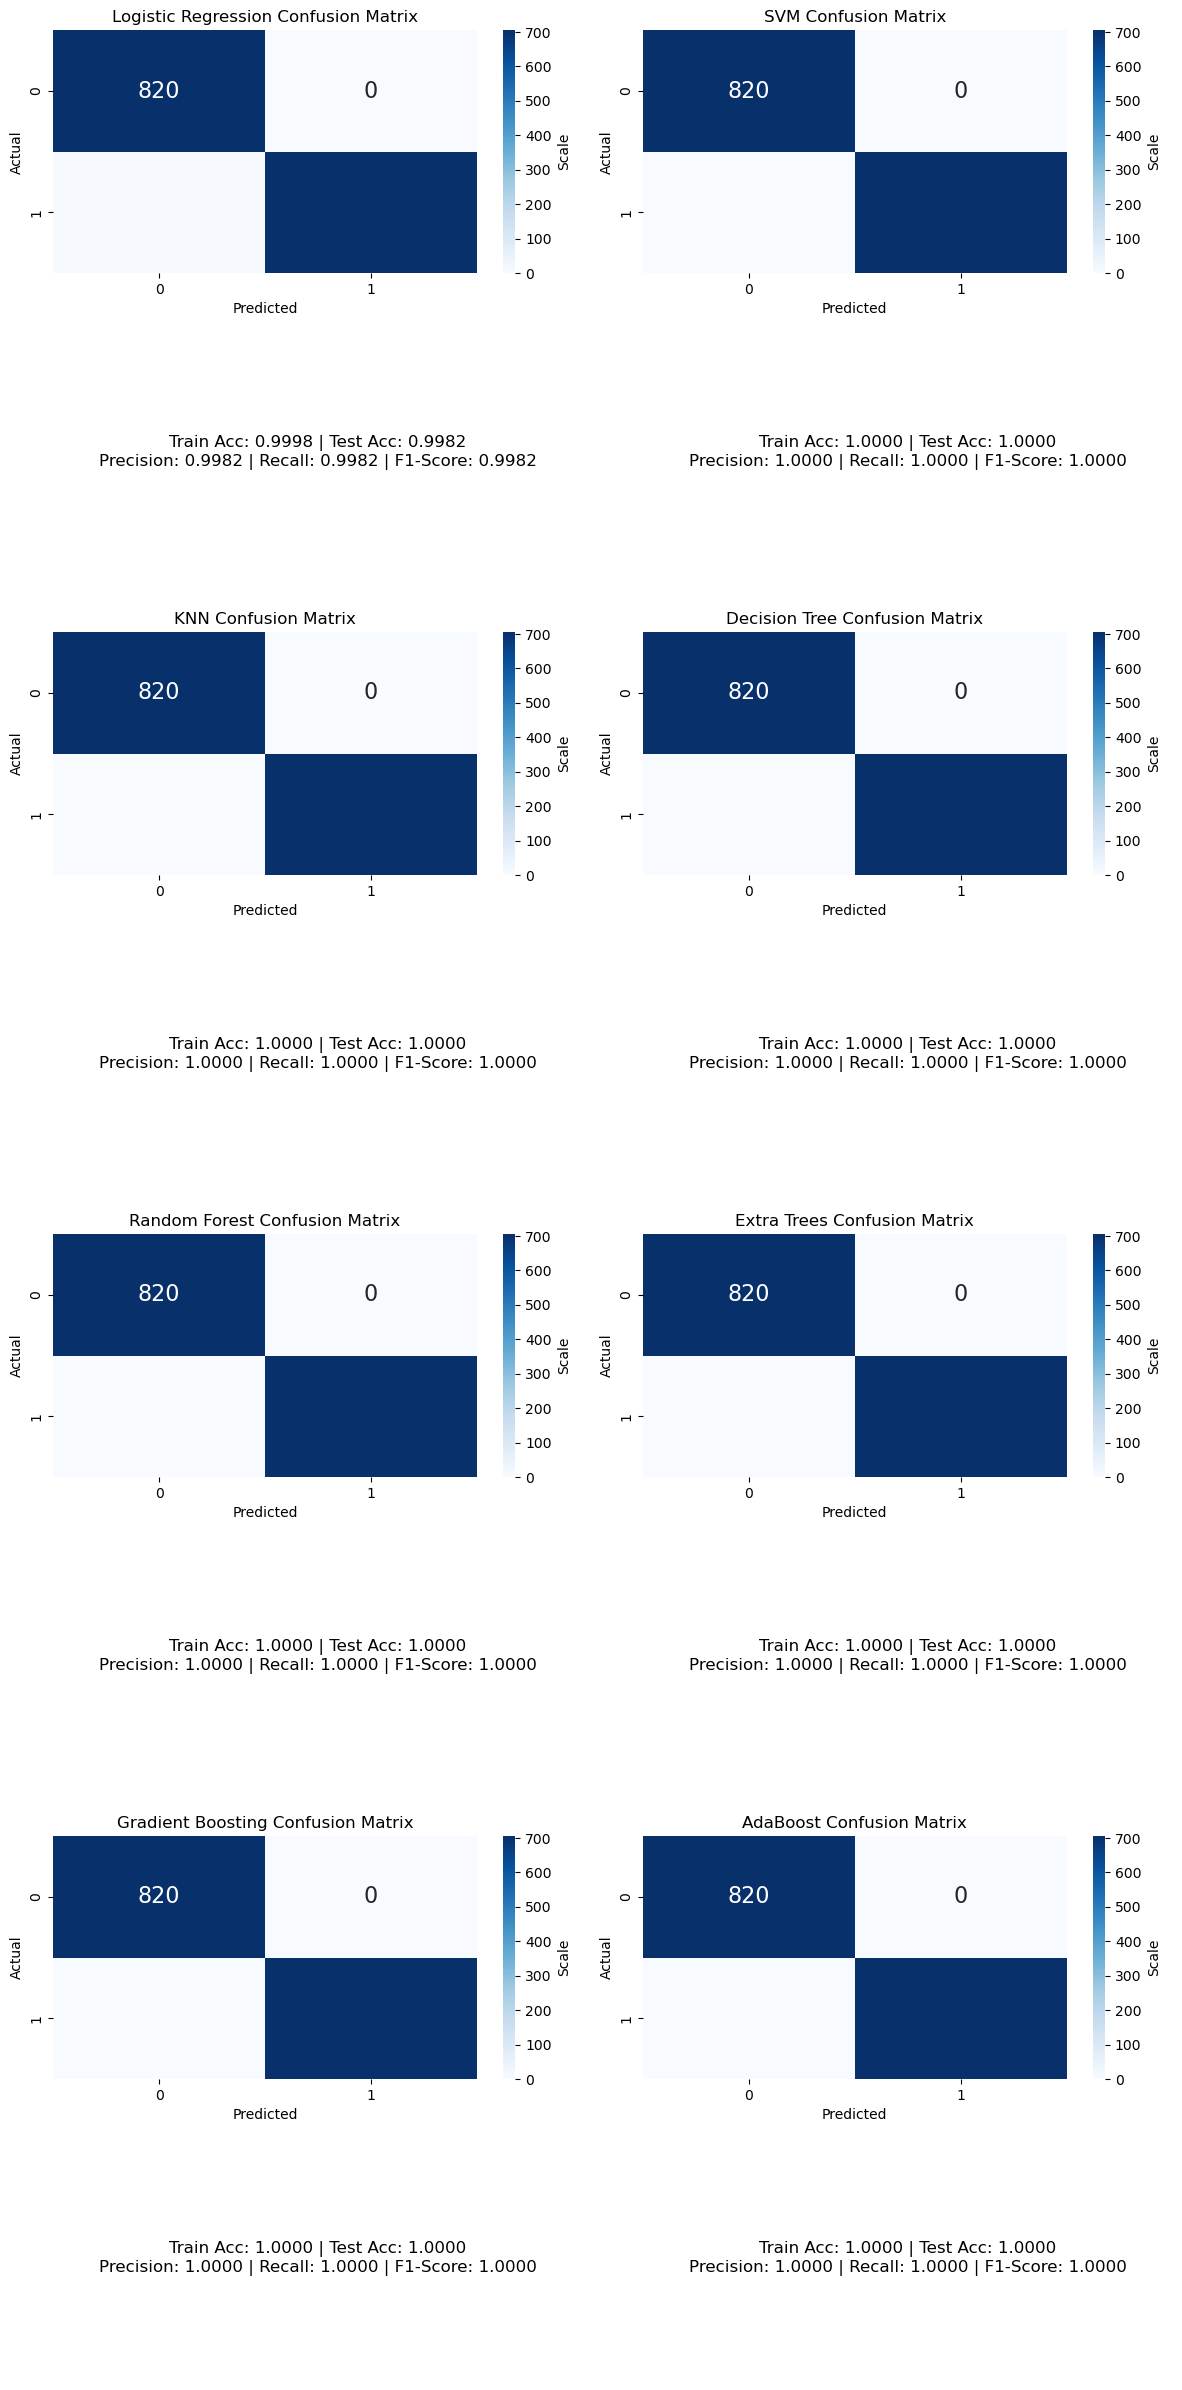

The best model is SVM with a test accuracy of 1.0000.


In [24]:
pipe.run_pipeline(drop_max_na_col_in=True,drop_threshold_in=0.25)

In [26]:
pipe.get_feature_importance()

The model SVC() does not support feature importance.


In [28]:
my_model=pipe.user_model_return()

The models trained are: 

0. Logistic Regression
1. SVM
2. KNN
3. Decision Tree
4. Random Forest
5. Extra Trees
6. Gradient Boosting
7. AdaBoost


Which model would you like? 3


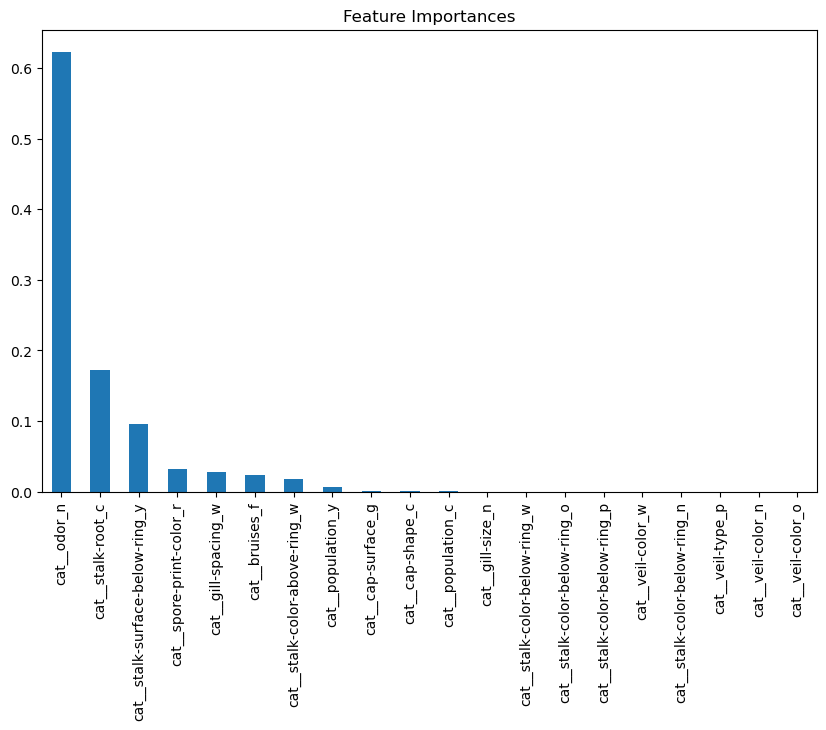

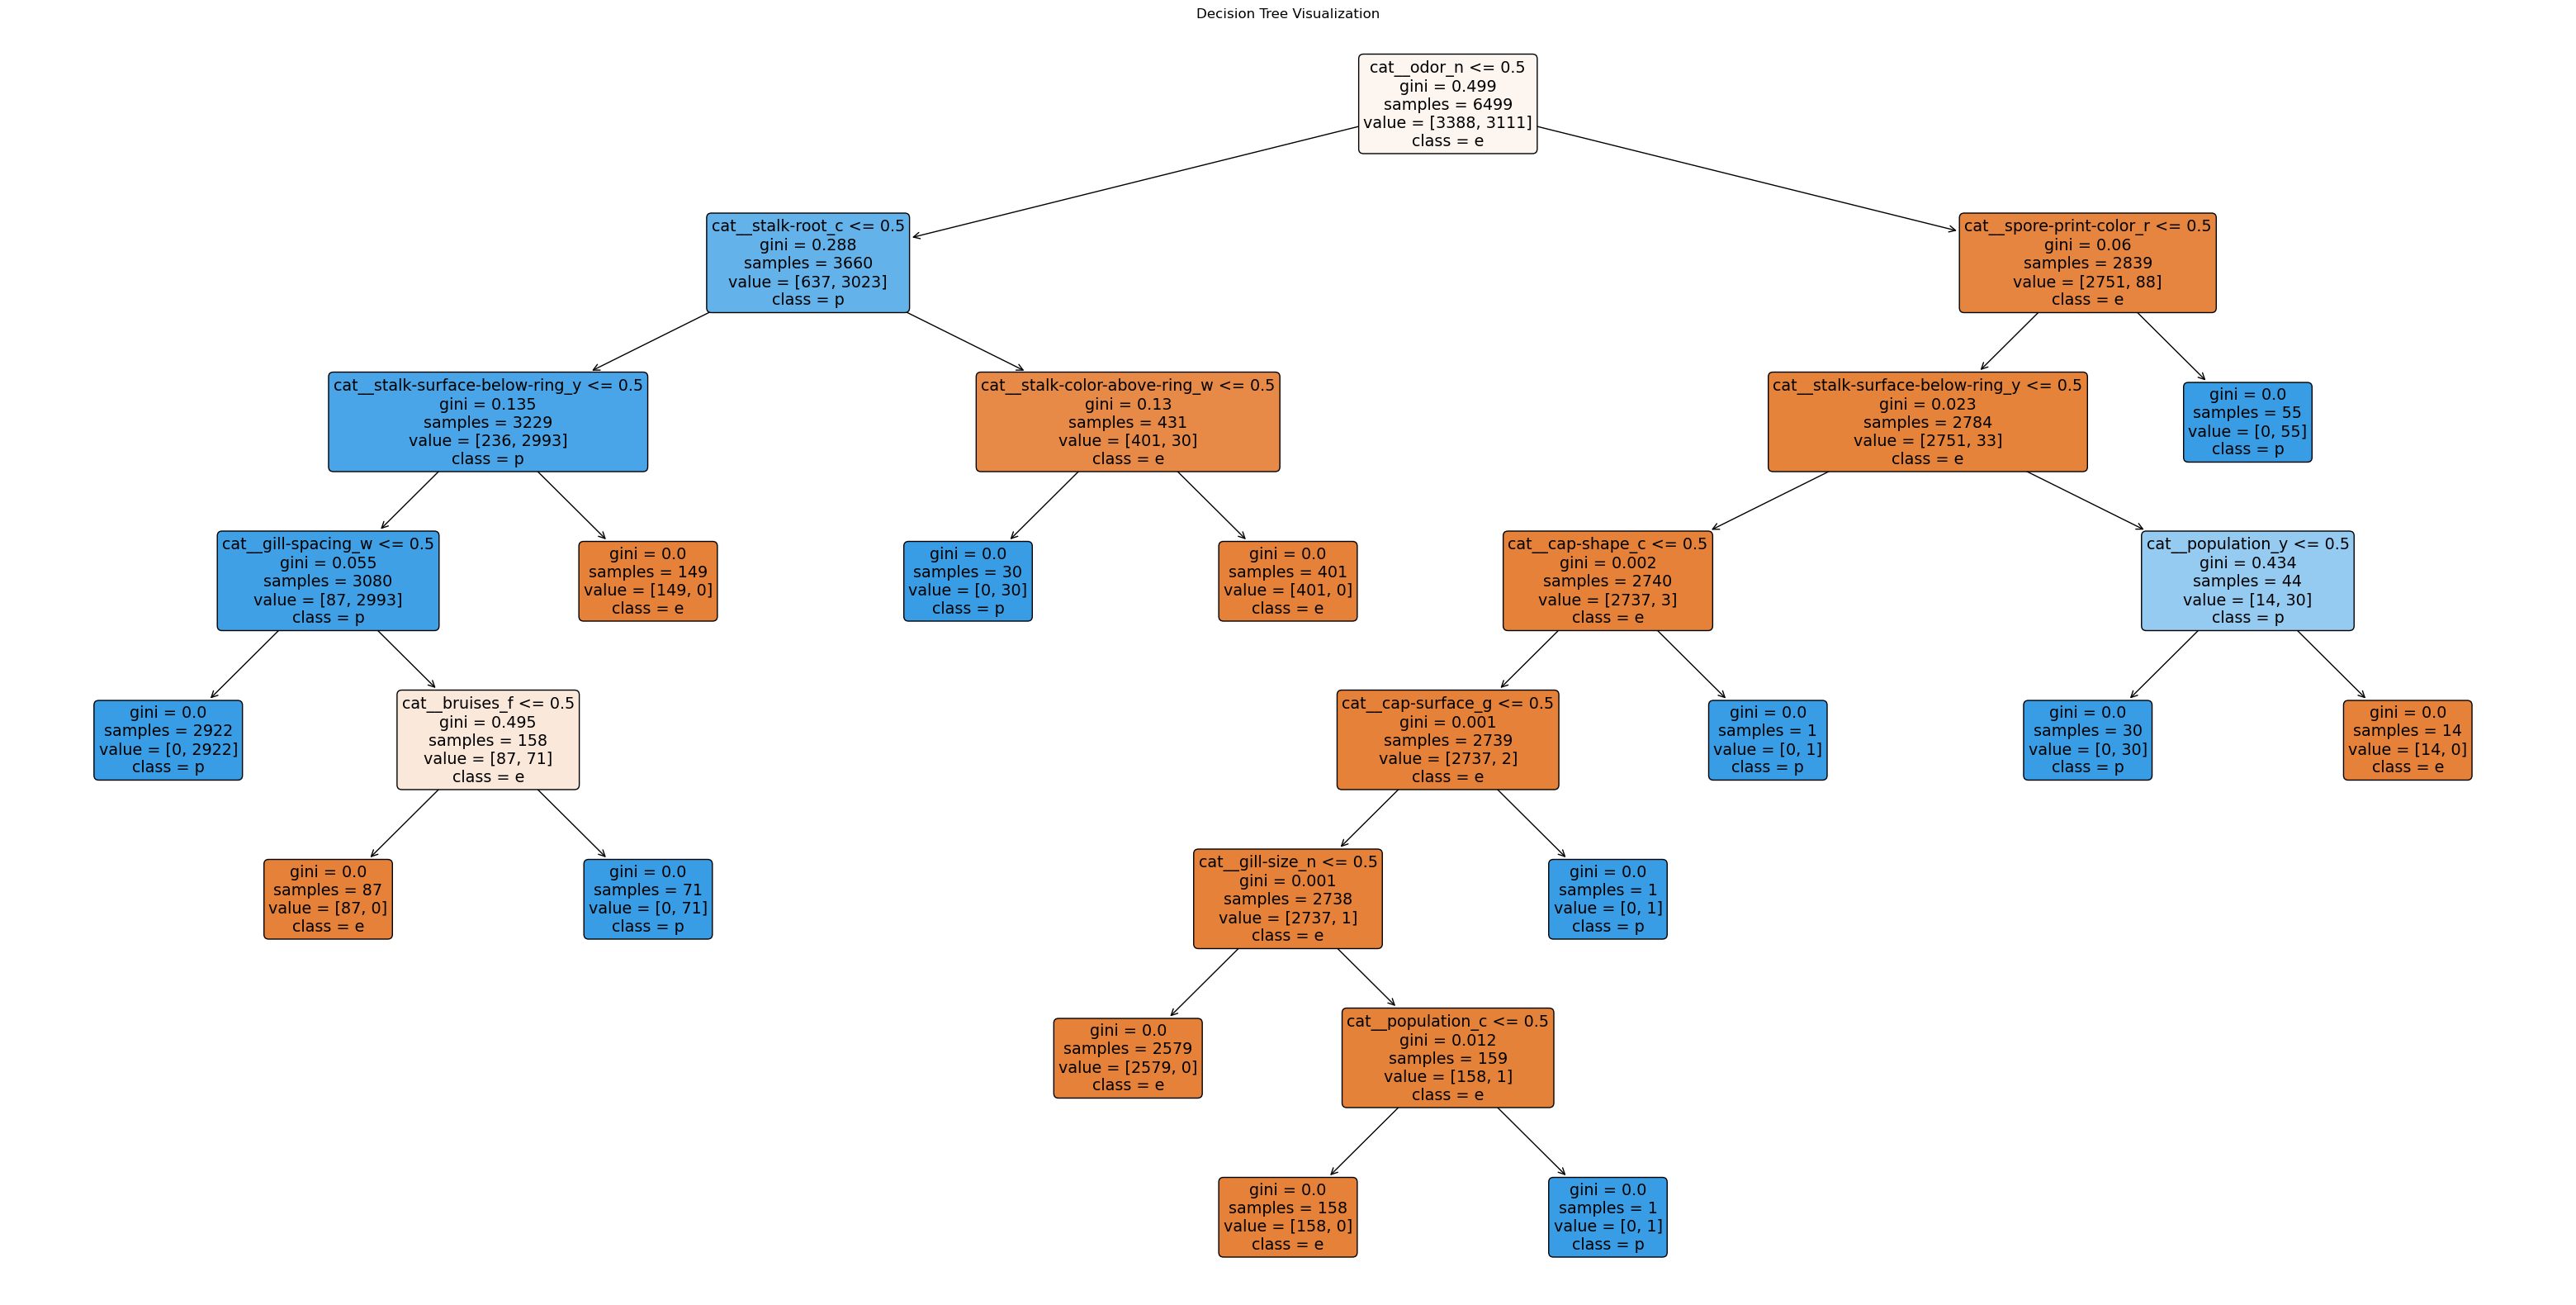

In [30]:
pipe.get_feature_importance()

pipe.visualize_decision_tree()

In [18]:
ht = mlht(model=my_model, pipeline=pipe, cores=2)

In [20]:
ht.run_tuning()

Current model parameters:

1. ccp_alpha: 0.0
2. class_weight: None
3. criterion: gini
4. max_depth: None
5. max_features: None
6. max_leaf_nodes: None
7. min_impurity_decrease: 0.0
8. min_samples_leaf: 1
9. min_samples_split: 2
10. min_weight_fraction_leaf: 0.0
11. random_state: None
12. splitter: best



Enter the parameter you'd like to tune (or type 'done' to finish):  max_depth
Enter new values for 'max_depth' (comma-separated if multiple):  3,5,7,9

Enter the parameter you'd like to tune (or type 'done' to finish):  criterion
Enter new values for 'criterion' (comma-separated if multiple):  'gini','entropy'

Enter the parameter you'd like to tune (or type 'done' to finish):  done



The parameters being tested for best tuning are: 

max_depth: [3, 5, 7, 9]
criterion: ['gini', 'entropy']
Fitting 10 folds for each of 8 candidates, totalling 80 fits

The best estimator for DecisionTreeClassifier() is: 
DecisionTreeClassifier(max_depth=7)

The best score with that estimator is: 
0.9998461538461537

The best parameters after tuning are : 
{'criterion': 'gini', 'max_depth': 7}
Tuning done! You can now access the object for the tuned model(.tuned_model) or retune for a different model.


In [22]:
tm = ht.tuned_model

In [24]:
tm

DecisionTreeClassifier(max_depth=7)

In [12]:
pipe.X_train

<6499x112 sparse matrix of type '<class 'numpy.float64'>'
	with 136479 stored elements in Compressed Sparse Row format>

In [37]:
x_train_sparse = pd.DataFrame.sparse.from_spmatrix(pipe.X_train)
x_train_sparse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Columns: 117 entries, 0 to 116
dtypes: Sparse[float64, 0](117)
memory usage: 1.6 MB


In [35]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

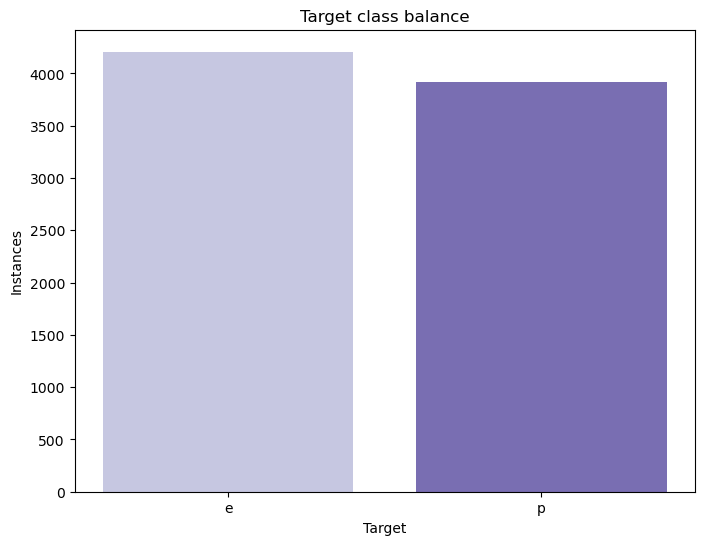

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Example Series
data = df_read['class']

# Count occurrences of 'e' and 'p'
value_counts = data.value_counts()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create custom gradient color for each bar
colors = sns.color_palette("Purples", len(value_counts))

bars = ax.bar(value_counts.index, value_counts.values)

# Apply gradient to each bar
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

# Adding labels and title
ax.set_title('Target class balance')
ax.set_xlabel('Target')
ax.set_ylabel('Instances')

# Display the plot
plt.show()